In [3]:
from cox.readers import CollectionReader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [9]:
d

'results/augmix_sun397'

In [14]:
parent_dir = 'results'
reader = CollectionReader(directory=parent_dir)

logs_df = reader.df('logs')
metadata_df = reader.df('metadata')

100%|██████████| 36/36 [00:00<00:00, 88.46it/s]


In [26]:
logs_df['source_model'] = logs_df.exp_id.str.split('_', expand=True)[0]
logs_df['target_dataset'] = logs_df.exp_id.str.split('_', expand=True)[1]

In [30]:
logs_df

,epoch,nat_prec1,adv_prec1,nat_loss,adv_loss,train_prec1,train_loss,time,exp_id,source_model,target_dataset
0,1,21.481108,-1.0,4.949470,-1.0,6.080605,5.659345,260.406075,augmix_sun397,augmix,sun397
1,6,52.806042,-1.0,1.994232,-1.0,48.523930,2.353472,1292.931705,augmix_sun397,augmix,sun397
2,11,58.267002,-1.0,1.608997,-1.0,60.236774,1.670092,2330.389231,augmix_sun397,augmix,sun397
3,16,61.022667,-1.0,1.461783,-1.0,67.934509,1.329770,3375.526495,augmix_sun397,augmix,sun397
4,21,61.954659,-1.0,1.389557,-1.0,73.869019,1.079637,4389.258953,augmix_sun397,augmix,sun397
...,...,...,...,...,...,...,...,...,...,...,...
26,131,77.836304,-1.0,0.951630,-1.0,95.298317,0.229047,20647.415575,adversarial_caltech256,adversarial,caltech256
27,136,77.612427,-1.0,0.960547,-1.0,95.518806,0.226652,21432.366671,adversarial_caltech256,adversarial,caltech256
28,141,77.572922,-1.0,0.969190,-1.0,95.706871,0.219750,22198.511405,adversarial_caltech256,adversarial,caltech256
29,146,77.717781,-1.0,0.955818,-1.0,95.603111,0.222798,22967.757221,adversarial_caltech256,adversarial,caltech256


In [34]:
pd.pivot_table(logs_df, columns='target_dataset', index='source_model', values='nat_prec1', aggfunc='max')

target_dataset,aircraft,birds,caltech101,caltech256,dtd,flowers,pets,sun397
source_model,,,,,,,,
adversarial,84.338432,72.328964,91.659286,78.158951,70.372337,93.576195,90.842186,59.123425
augmix,36.993698,73.773094,94.935364,83.696579,76.808510,90.502525,93.867538,62.861458
megamix,67.416740,59.735649,58.686028,47.744781,48.297871,80.988777,59.062412,39.395466
standard,84.848480,73.124466,93.731186,82.662804,75.957443,96.487236,94.249115,62.916874


In [41]:
metadata_df[metadata_df['exp_id'] == 'megamix_birds']['freeze_level']

0   -1
Name: freeze_level, dtype: int64

In [36]:
logs_df[logs_df['exp_id'] == 'megamix_birds']

,epoch,nat_prec1,adv_prec1,nat_loss,adv_loss,train_prec1,train_loss,time,exp_id,source_model,target_dataset
0,1,5.238037,-1.0,4.928944,-1.0,2.240108,5.691536,318.143488,megamix_birds,megamix,birds
1,6,15.395912,-1.0,4.069788,-1.0,17.440401,3.904590,1890.049746,megamix_birds,megamix,birds
2,11,24.268755,-1.0,3.504051,-1.0,26.593630,3.340842,3420.784141,megamix_birds,megamix,birds
3,16,25.749601,-1.0,3.427584,-1.0,33.675064,2.940414,4935.943576,megamix_birds,megamix,birds
4,21,26.753151,-1.0,3.468015,-1.0,38.874439,2.669998,6459.217130,megamix_birds,megamix,birds
5,26,33.888142,-1.0,3.000171,-1.0,43.201641,2.429287,7981.285815,megamix_birds,megamix,birds
6,31,34.634682,-1.0,3.077027,-1.0,47.691036,2.235370,9498.062913,megamix_birds,megamix,birds
7,36,26.312569,-1.0,3.552513,-1.0,50.644184,2.090321,11052.330268,megamix_birds,megamix,birds
8,41,43.923630,-1.0,2.461967,-1.0,52.936317,1.986029,12590.286958,megamix_birds,megamix,birds
9,46,40.203156,-1.0,2.590475,-1.0,55.531414,1.880001,14120.458698,megamix_birds,megamix,birds


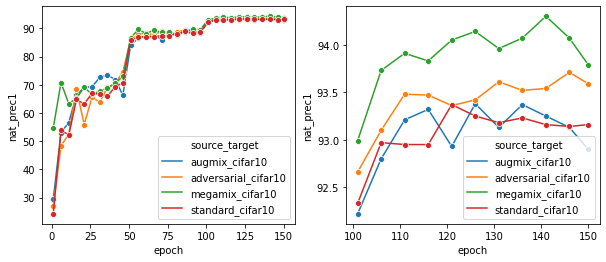

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.lineplot(data=df, x='epoch', y='nat_prec1', hue='source_target', marker='o', ax=axs[0])
sns.lineplot(data=df[df.epoch>=100], x='epoch', y='nat_prec1', hue='source_target', marker='o', ax=axs[1])
plt.savefig('transfer_cifar10.pdf', dpi=2000)

In [21]:
reader = CollectionReader(directory='augmix_cifar10')
temp_df = reader.df('metadata')
temp_df

100%|██████████| 2/2 [00:00<00:00, 126.84it/s]


,config_path,eval_only,exp_name,data,arch,batch_size,workers,resume,resume_optimizer,data_aug,...,attack_lr,use_best,random_restarts,random_start,custom_eps_multiplier,dataset,freeze_level,per_class_accuracy,model_id,exp_id
0,None,0,None,/tmp/,resnet50,64,30,None,0,1,...,None,None,None,None,None,cifar10,-1,False,augmix,7c397a35-d933-44d7-9fd3-9a1af98368ce
0,None,0,None,/tmp/,resnet50,64,30,None,0,1,...,None,None,None,None,None,cifar10,-1,False,augmix,2e174b0e-5c33-48de-bbd6-482f67e8f272


In [23]:
temp_df.lr

0    0.1
0    0.1
Name: lr, dtype: float64